In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load and display data
data = pd.read_csv("house_loan.csv")
data.head(5)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
# Check for the Null Values
data.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [ ]:
# Remove all the NAN values
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47251 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47251 non-null  object 
 1   Age                         47251 non-null  int64  
 2   Income (USD)                47251 non-null  float64
 3   Income Stability            47251 non-null  object 
 4   Property Age                47251 non-null  float64
 5   Property Location           47251 non-null  object 
 6   Property Price              47251 non-null  float64
 7   Loan Sanction Amount (USD)  47251 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.2+ MB


# Exploratory Data Analysis



In [ ]:
data.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47251.000000,47251.000000,47251.000000,4.725100e+04,47251.000000
mean,40.005185,2586.498103,2586.467247,1.350981e+05,46474.467952
std,16.086562,1557.676706,1557.737980,9.459404e+04,32545.590334
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,25.000000,1653.735000,1652.820000,6.251069e+04,21775.599375
50%,40.000000,2245.460000,2244.810000,1.130936e+05,38818.433721
75%,55.000000,3128.610000,3128.570000,1.819546e+05,62574.719455
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income (USD)'}>],
       [<Axes: title={'center': 'Property Age'}>,
        <Axes: title={'center': 'Property Price'}>],
       [<Axes: title={'center': 'Loan Sanction Amount (USD)'}>, <Axes: >]],
      dtype=object)

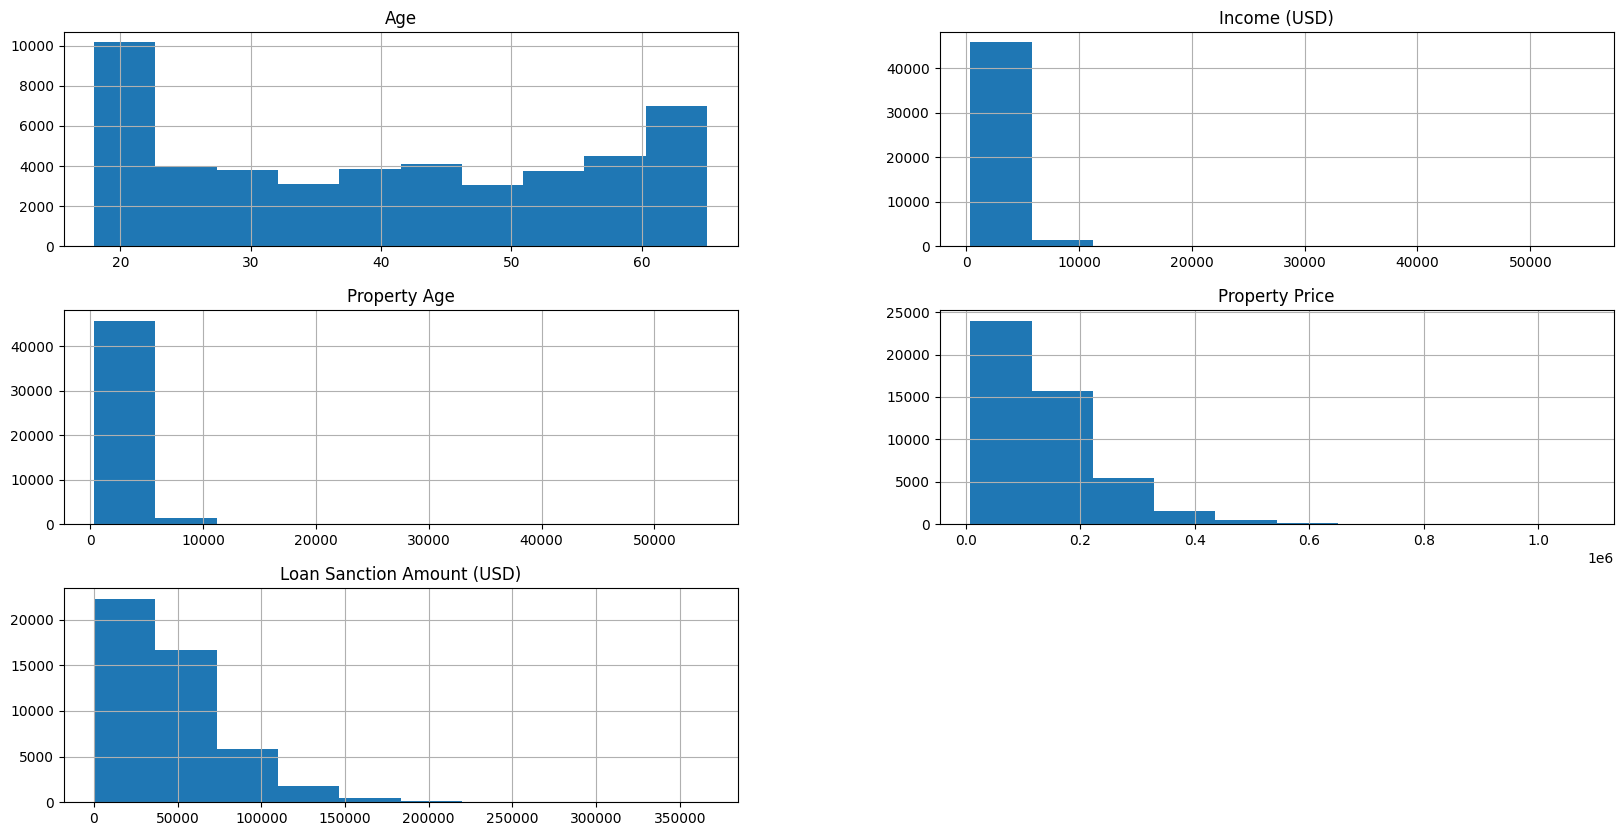

In [ ]:
data.hist(figsize=(20,10))

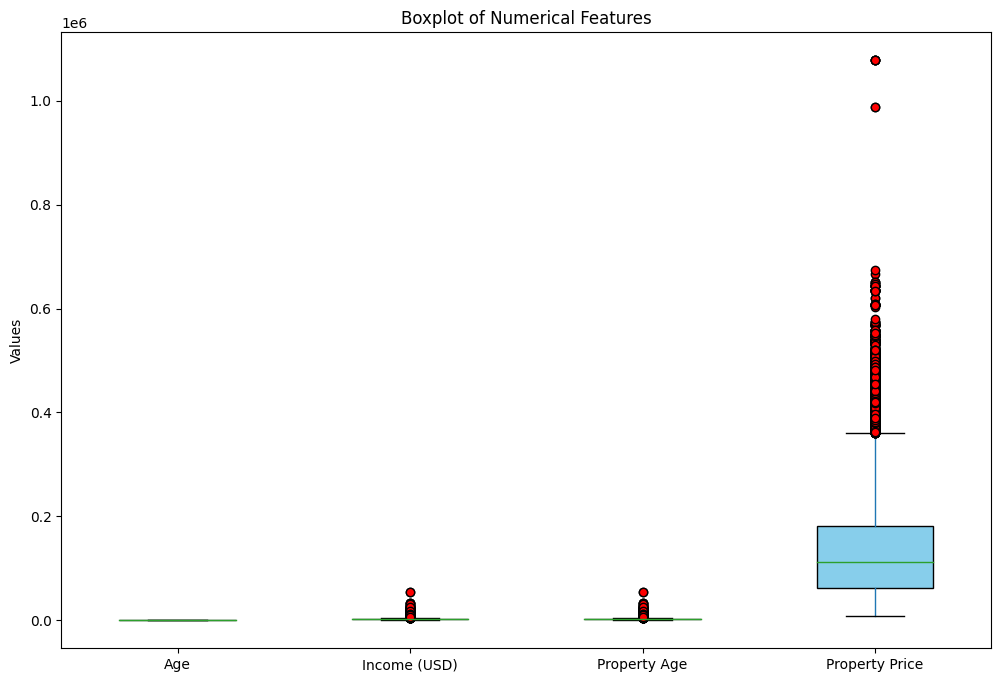

In [ ]:
numerical_cols = ['Age', 'Income (USD)', 'Property Age', 'Property Price']
plt.figure(figsize=(12, 8))
data[numerical_cols].boxplot(patch_artist=True, widths=0.5, boxprops=dict(facecolor='skyblue'), flierprops=dict(marker='o', markersize=6, markerfacecolor='red', linestyle='none'))
# Customize labels and title
plt.xticks(ticks=range(1, len(numerical_cols) + 1), labels=numerical_cols)
plt.title('Boxplot of Numerical Features')
plt.ylabel('Values')
plt.grid(False)
plt.show()

In [ ]:
# Converts categorical variables into indicator variables
data= data.join(pd.get_dummies(data['Property Location'])).drop(["Property Location"], axis=1)
data= data.join(pd.get_dummies(data['Income Stability'])).drop(["Income Stability"], axis=1)
data= data.join(pd.get_dummies(data['Gender'])).drop(["Gender"], axis=1)

In [ ]:
data.rename(columns={'M': 'Male'}, inplace=True)
data.rename(columns={'F': 'Female'}, inplace=True)
data.rename(columns={'Low': 'Low Income'}, inplace=True)
data.rename(columns={'High': 'High Income'}, inplace=True)

In [ ]:
data.corr()

<ipython-input-36-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD),Rural,Semi-Urban,Urban,High,Low
Age,1.000000,-0.044086,-0.044085,-0.003274,-0.000115,0.000903,0.011407,-0.012587,0.455855,-0.455855
Income (USD),-0.044086,1.000000,0.999986,0.358110,0.392897,-0.002252,0.004813,-0.002635,-0.080961,0.080961
Property Age,-0.044085,0.999986,1.000000,0.358110,0.392892,-0.002228,0.004824,-0.002670,-0.081008,0.081008
Property Price,-0.003274,0.358110,0.358110,1.000000,0.994429,0.001099,-0.000659,-0.000443,-0.004813,0.004813
Loan Sanction Amount (USD),-0.000115,0.392897,0.392892,0.994429,1.000000,0.003297,-0.003177,-0.000103,0.070969,-0.070969
Rural,0.000903,-0.002252,-0.002228,0.001099,0.003297,1.000000,-0.519293,-0.485409,-0.005812,0.005812
Semi-Urban,0.011407,0.004813,0.004824,-0.000659,-0.003177,-0.519293,1.000000,-0.495094,0.008223,-0.008223
Urban,-0.012587,-0.002635,-0.002670,-0.000443,-0.000103,-0.485409,-0.495094,1.000000,-0.002504,0.002504
High,0.455855,-0.080961,-0.081008,-0.004813,0.070969,-0.005812,0.008223,-0.002504,1.000000,-1.000000
Low,-0.455855,0.080961,0.081008,0.004813,-0.070969,0.005812,-0.008223,0.002504,-1.000000,1.000000


<ipython-input-37-e3159463222f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')


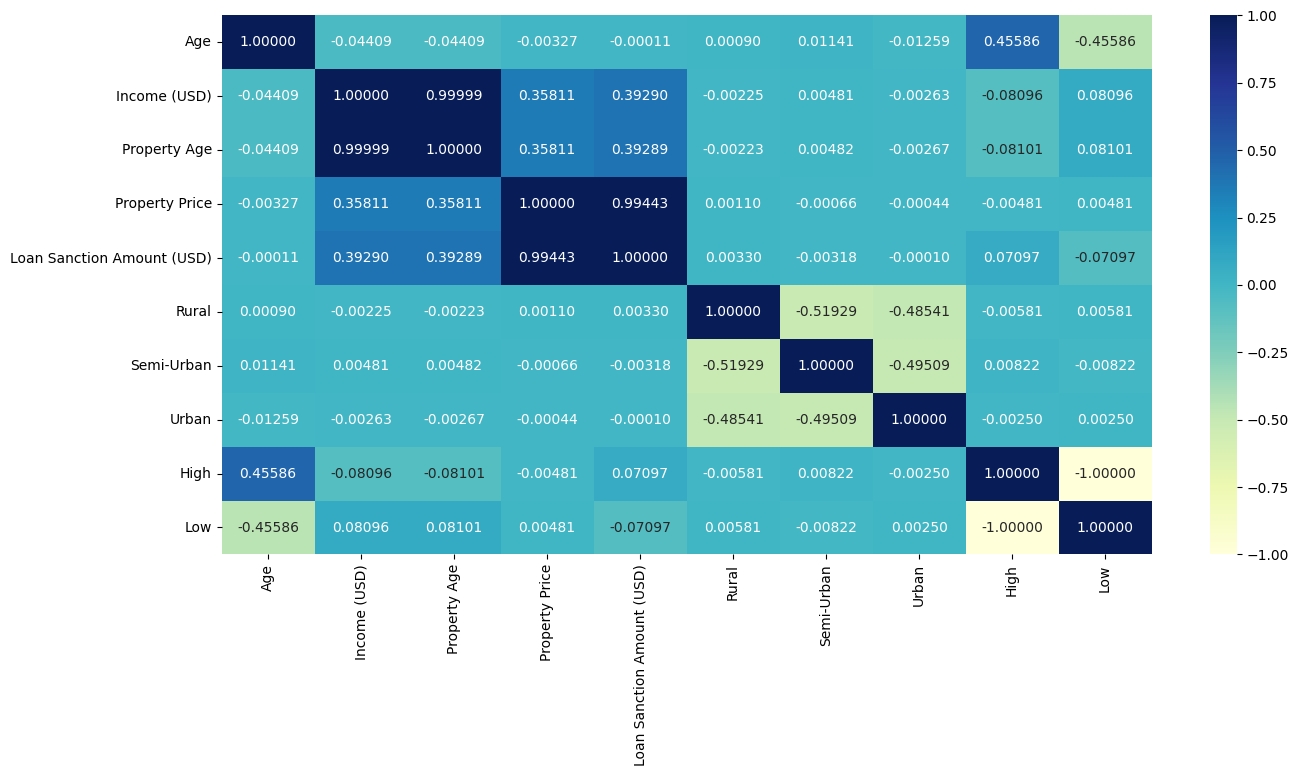

In [ ]:
# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')
plt.show()

In [ ]:
# Get the column names
data.columns

Index(['Gender', 'Age', 'Income (USD)', 'Property Age', 'Property Price',
       'Loan Sanction Amount (USD)', 'Rural', 'Semi-Urban', 'Urban', 'High',
       'Low'],
      dtype='object')

In [ ]:
columns = data.columns.tolist()
removed_column=['Loan Sanction Amount (USD)','Age', 'Gender']
for col in removed_column:
    if col in columns:
        columns.remove(col)


In [ ]:
# Pre-process data, determine feature x and label y
feature_data = data[columns]
target_data = data['Loan Sanction Amount (USD)']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into two subsets for training and testing.
trainX,testX, trainY,testY = train_test_split(feature_data, target_data, train_size=0.70)
# Count data samples in Training set.
print('Training:' + str(trainX.shape))
# Count data samples in Test set.
print('Test:' + str(testX.shape))

Training:(33075, 8)
Test:(14176, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
reg= LinearRegression()

In [ ]:
# Scaler the data
trainX_s = scaler.fit_transform(trainX)
testX_s = scaler.transform(testX)

In [ ]:
# Learn Linear Regression using (x, y) pairs in the Training set.
reg.fit(trainX_s,trainY)

LinearRegression()

In [ ]:
# Observe the bias (theta_0) parameter.
print("Model intercept: " + str(reg.intercept_))
# Observe 8 coefficients corresponding to 5 features x after learning.
print("Model coefficients: " + str(reg.coef_))

Model intercept: 46527.598827298105
Model coefficients: [ 2.10226534e+03 -5.13947577e+02  3.17987309e+04  6.05499214e+01
 -7.03557225e+01  1.04441692e+01  1.29765386e+03 -1.29765386e+03]


In [ ]:
# Predict on test set
pred = reg.predict(testX_s)

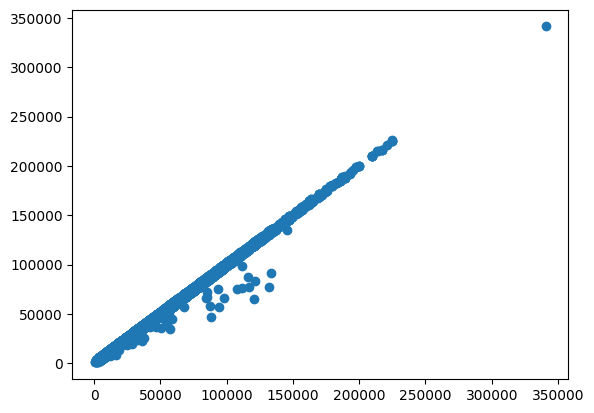

In [ ]:
plt.scatter(testY, pred)

In [ ]:
reg.score(testX_s, testY)

0.99726407028961

In [ ]:
 # Calculate mean absolute error to observe the performance of the learned model based on the predictions and the labels.
from sklearn.metrics import mean_absolute_error
pred = reg.predict(testX_s)
mean_absolute_error(y_pred=pred, y_true=testY)

1012.027879916084